# Project 3C: Depression and Loneliness Text Analysis

### Overall Contents:
- Background
- Data Collection
- Data Cleaning
- Exploratory Data Analysis
- [Preprocessing](#5.-Preprocessing) **(In this notebook)**
- [Modeling](#6.-Modeling) **(In this notebook)**
- [Evaluation](#7.-Evaluation) **(In this notebook)**
- [Conclusions and Recommendations](#8.-Conclusions-and-Recommendations) **(In this notebook)**

### Data Dictionary
The dataset contains the posts that were published under the social news website, [reddit](https://www.reddit.com) between September 2020 to March 2021. 

The dataset used for this analysis are as followed:--

* depression_lonely_data_clean (compilation of depression_data and lonely_data that have undergone text preprocessing) - labelled as depression_lonely_data

|Feature|Type|Dataset|Description|
|:---|:---|:---|:---|
|**author**|*object*| depression_lonely_data_clean|The author who write the post in subreddit|
|**subreddit**|*object*| depression_lonely_data_clean|The forum in the website reddit|
|**selftext**|*object*| depression_lonely_data_clean|The post in the subreddit|
|**title**|*object*| depression_lonely_data_clean|The title of the post in the subreddit|
|**created_utc**|*int64*| depression_lonely_data_clean|The utc time that the post is created|
|**selftext_word_count**|*int64*| depression_lonely_data_clean|The word count of a post|
|**title_word_count**|*int64*| depression_lonely_data_clean|The word count of a title post|
|**total_posts**|*int64*|depression_lonely_data_clean|The number of posts an author posted during the period the data was collected|
|**selftext_tokenize**|*object*|depression_lonely_data_clean|The posts that undergo tokenization|
|**selftext_stopremoval**|*object*| depression_lonely_data_clean|The posts that undergo tokenization and removal of stop words|
|**title_tokenize**|*object*| depression_lonely_data_clean|The title of the posts that undergo tokenization|
|**title_stopremoval**|*object*| depression_lonely_data_clean|The title of the posts that undergo tokenization and removal of stop words|
|**selftext_lem**|*object*| depression_lonely_data_clean|The posts that undergo tokenization, removal of stop words and lemmatization|
|**title_lem**|*object*| depression_lonely_data_clean|The title posts that undergo tokenization, removal of stop words and lemmatization|
|**selftext_pstem**|*object*| depression_lonely_data_clean|The posts that undergo tokenization, removal of stop words and stemming|
|**title_pstem**|*object*| depression_lonely_data_clean|The title posts that undergo tokenization, removal of stop words and stemming|

The data source below are obtained from database [reddit](https://www.reddit.com):
* [depression](https://www.reddit.com/search/?q=depression) 
* [foreveralone](https://www.reddit.com/search?q=foreveralone&type=link)

## 5. Preprocessing

### 5.1 Libraries Import

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score

%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

# Maximum display of columns
pd.options.display.max_colwidth = 400
pd.options.display.max_rows = 400

### 5.2 Data Import

In [2]:
# Import of depression_lonely_data from csv
depression_lonely_data = pd.read_csv('../data/depression_lonely_data_clean.csv')

In [3]:
# Visualize the dataframe with its proportion in subreddit
print(f"{depression_lonely_data.subreddit.value_counts(normalize=True)}")
depression_lonely_data.head(2)

depression      0.511242
foreveralone    0.488758
Name: subreddit, dtype: float64


,author,subreddit,selftext,title,created_utc,selftext_word_count,title_word_count,total_posts,selftext_tokenize,selftext_stopremoval,title_tokenize,title_stopremoval,selftext_lem,title_lem,selftext_pstem,title_pstem
0,hatetheseparties521,depression,im worried i permanently fd up my dick how rare is this disease from antidepressants,how common is pssd,1617206312,15,4,2,"['im', 'worried', 'i', 'permanently', 'fd', 'up', 'my', 'dick', 'how', 'rare', 'is', 'this', 'disease', 'from', 'antidepressants']","['im', 'worried', 'permanently', 'fd', 'dick', 'rare', 'disease', 'antidepressants']","['how', 'common', 'is', 'pssd']","['common', 'pssd']",im worried permanently fd dick rare disease antidepressant,common pssd,im worri perman fd dick rare diseas antidepress,common pssd
1,jaksiejsndnd,depression,im going to do it to avoid responsibilities and shit i dont fcking care i just want to die dont want to talk about it bye just a week from now or something ill be gone,im going to end my life,1617206166,37,6,2,"['im', 'going', 'to', 'do', 'it', 'to', 'avoid', 'responsibilities', 'and', 'shit', 'i', 'dont', 'fcking', 'care', 'i', 'just', 'want', 'to', 'die', 'dont', 'want', 'to', 'talk', 'about', 'it', 'bye', 'just', 'a', 'week', 'from', 'now', 'or', 'something', 'ill', 'be', 'gone']","['im', 'going', 'avoid', 'responsibilities', 'shit', 'dont', 'fcking', 'care', 'want', 'die', 'dont', 'want', 'talk', 'bye', 'week', 'something', 'ill', 'gone']","['im', 'going', 'to', 'end', 'my', 'life']","['im', 'going', 'end', 'life']",im going avoid responsibility shit dont fcking care want die dont want talk bye week something ill gone,im going end life,im go avoid respons shit dont fcking care want die dont want talk bye week someth ill gone,im go end life


### 5.3 Preprocessing

For modeling, we will only be focusing on selftext.

Part of the preprocessing has been performed in the exploratory data analysis section

#### 5.3.1 Check for missing values

In [4]:
# Check for missing values
depression_lonely_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9829 entries, 0 to 9828
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   author                9829 non-null   object
 1   subreddit             9829 non-null   object
 2   selftext              9828 non-null   object
 3   title                 9827 non-null   object
 4   created_utc           9829 non-null   int64 
 5   selftext_word_count   9829 non-null   int64 
 6   title_word_count      9829 non-null   int64 
 7   total_posts           9829 non-null   int64 
 8   selftext_tokenize     9829 non-null   object
 9   selftext_stopremoval  9829 non-null   object
 10  title_tokenize        9829 non-null   object
 11  title_stopremoval     9829 non-null   object
 12  selftext_lem          9822 non-null   object
 13  title_lem             9757 non-null   object
 14  selftext_pstem        9822 non-null   object
 15  title_pstem           9757 non-null   

In [5]:
# The presence of missing values
depression_lonely_data[depression_lonely_data["selftext_pstem"].isnull()]["selftext_pstem"].head()

926     NaN
5853    NaN
6256    NaN
7103    NaN
8940    NaN
Name: selftext_pstem, dtype: object

**There are missing values present in selftext, thus we will be removing the missing values**

In [6]:
# To remove the missing values
depression_lonely_data = depression_lonely_data[~depression_lonely_data["selftext_pstem"].isnull()]
depression_lonely_data = depression_lonely_data.reset_index(drop=True)

In [7]:
# Check for missing values after removal
depression_lonely_data["selftext_pstem"].isnull().sum()

0

In [8]:
depression_lonely_data.subreddit.value_counts(normalize=True)

depression      0.511505
foreveralone    0.488495
Name: subreddit, dtype: float64

#### 5.3.2 Binarize the subreddit

In [9]:
depression_lonely_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   author                9822 non-null   object
 1   subreddit             9822 non-null   object
 2   selftext              9822 non-null   object
 3   title                 9821 non-null   object
 4   created_utc           9822 non-null   int64 
 5   selftext_word_count   9822 non-null   int64 
 6   title_word_count      9822 non-null   int64 
 7   total_posts           9822 non-null   int64 
 8   selftext_tokenize     9822 non-null   object
 9   selftext_stopremoval  9822 non-null   object
 10  title_tokenize        9822 non-null   object
 11  title_stopremoval     9822 non-null   object
 12  selftext_lem          9822 non-null   object
 13  title_lem             9751 non-null   object
 14  selftext_pstem        9822 non-null   object
 15  title_pstem           9751 non-null   

In [10]:
# Dummy the subreddit columns
depression_lonely_data = pd.get_dummies(depression_lonely_data, columns = ["subreddit"], drop_first = True)
depression_lonely_data.head(2)

,author,selftext,title,created_utc,selftext_word_count,title_word_count,total_posts,selftext_tokenize,selftext_stopremoval,title_tokenize,title_stopremoval,selftext_lem,title_lem,selftext_pstem,title_pstem,subreddit_foreveralone
0,hatetheseparties521,im worried i permanently fd up my dick how rare is this disease from antidepressants,how common is pssd,1617206312,15,4,2,"['im', 'worried', 'i', 'permanently', 'fd', 'up', 'my', 'dick', 'how', 'rare', 'is', 'this', 'disease', 'from', 'antidepressants']","['im', 'worried', 'permanently', 'fd', 'dick', 'rare', 'disease', 'antidepressants']","['how', 'common', 'is', 'pssd']","['common', 'pssd']",im worried permanently fd dick rare disease antidepressant,common pssd,im worri perman fd dick rare diseas antidepress,common pssd,0
1,jaksiejsndnd,im going to do it to avoid responsibilities and shit i dont fcking care i just want to die dont want to talk about it bye just a week from now or something ill be gone,im going to end my life,1617206166,37,6,2,"['im', 'going', 'to', 'do', 'it', 'to', 'avoid', 'responsibilities', 'and', 'shit', 'i', 'dont', 'fcking', 'care', 'i', 'just', 'want', 'to', 'die', 'dont', 'want', 'to', 'talk', 'about', 'it', 'bye', 'just', 'a', 'week', 'from', 'now', 'or', 'something', 'ill', 'be', 'gone']","['im', 'going', 'avoid', 'responsibilities', 'shit', 'dont', 'fcking', 'care', 'want', 'die', 'dont', 'want', 'talk', 'bye', 'week', 'something', 'ill', 'gone']","['im', 'going', 'to', 'end', 'my', 'life']","['im', 'going', 'end', 'life']",im going avoid responsibility shit dont fcking care want die dont want talk bye week something ill gone,im going end life,im go avoid respons shit dont fcking care want die dont want talk bye week someth ill gone,im go end life,0


## 6 Modeling

### 6.1 Model the data 

We will be performing a train/test split on our data set to have a training set and a holdout set. In total, we will be using a null model as the baseline model and 3 models to fit the dataset and evaluate the models in predicting the y-values using the validation set.

The four models are:-
* Null Model
* Multinomial Naive Bayes
* K-nearest neighbours
* Logistic Regression

Note: A preliminary screening have been performed prior to setting the parameters listed in each model section.

As this project aims to develop a model that are able to predict the identification of depression and loneliness of the social media forum. As the prediction is either a depression or a loneliness forum, it is a categorical classification in which it is to predict the probability of a categorical dependent variable. Thus, multinomial naive bayes, logistic regression and k-nearest neighbours that are categorical classification models are chosen.

### 6.2 Set the X and y variable

In [11]:
x_data = depression_lonely_data["selftext_pstem"]
y_data = depression_lonely_data["subreddit_foreveralone"]

In [12]:
#Verify the dimensions
print(f"X_data shape is {x_data.shape}")
print(f"y_data shape is {y_data.shape}")

X_data shape is (9822,)
y_data shape is (9822,)


### 6.3 Split the data into train/test data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 42, stratify = y_data)

In [14]:
#Verify Dimensions
print('X train: ', X_train.shape)
print('y train: ', y_train.shape)
print('X test: ', X_test.shape)
print('y test: ', y_test.shape)

X train:  (7366,)
y train:  (7366,)
X test:  (2456,)
y test:  (2456,)


### 6.4 Null model

In [15]:
y_null = y_train.value_counts(normalize = True)
y_null.max()

0.5115395058376324

### 6.5 Multinomial Naive Bayes

We will be using Term Freqeuncy-Inverse Document Frequency (TF-IDF) Vectorizer. 
This is because as we are comparing two forums, we will want to find words that are common in certain documents but rare in other documents. The ability of TF-IDF to assign a rating importance of a word inside the document will allow us to enhance out the ability to distinguish the two forums.

In [16]:
# Pipeline for CountVectorizer
mnb_pipe = Pipeline(steps = [("tvec", TfidfVectorizer()), ("mnb", MultinomialNB())])

In [17]:
# Setting the hyperparameters values to gridsearch over

mnb_pipe_params = {
    "tvec__max_features": [4000,5000], 
    "tvec__min_df": [3,5,10],
    "tvec__max_df": [0.85,0.90],
    "tvec__stop_words": [None, 'english'],
    "tvec__ngram_range": [(1,1), (1,2)],
    'mnb__alpha': [0.1, 0.25, 0.5, 0.75, 1.0, 1.25],
    'mnb__fit_prior': [True, False]
}

In [18]:
# Instantiate GridSearchCV
gs_mnb = GridSearchCV(mnb_pipe, param_grid = mnb_pipe_params,cv = 5, verbose = 1, n_jobs = 4)

In [19]:
# Fit GridSearch to training data
gs_mnb.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  9.8min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 13.3min
[Parallel(n_jobs=4)]: Done 2880 out of 2880 | elapsed: 15.7min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=4,
             param_grid={'mnb__alpha': [0.1, 0.25, 0.5, 0.75, 1.0, 1.25],
                         'mnb__fit_prior': [True, False],
                         'tvec__max_df': [0.85, 0.9],
                         'tvec__max_features': [4000, 5000],
                         'tvec__min_df': [3, 5, 10],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']},
             verbose=1)

In [20]:
#The best score
gs_mnb.best_score_

0.8430637038838394

In [21]:
# Obtain the best parameters
gs_mnb.best_params_

{'mnb__alpha': 1.25,
 'mnb__fit_prior': False,
 'tvec__max_df': 0.85,
 'tvec__max_features': 4000,
 'tvec__min_df': 5,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

In [22]:
# Fit with the best parameters
mnb_best_model = gs_mnb.best_estimator_.fit(X_train, y_train)
mnb_best_model.fit(X_train, y_train)

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.85, max_features=4000, min_df=5,
                                 ngram_range=(1, 2))),
                ('mnb', MultinomialNB(alpha=1.25, fit_prior=False))])

In [23]:
# Score on the training set
mnb_best_model.score(X_train, y_train)

0.8700787401574803

In [24]:
# Score on the testing set (accuracy)
mnb_best_model.score(X_test, y_test)

0.8546416938110749

In [25]:
# Create a dataframe of the fittings performed in GridSearch
gs_mnb_df = pd.DataFrame(gs_mnb.cv_results_)
gs_mnb_df.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mnb__alpha,param_mnb__fit_prior,param_tvec__max_df,param_tvec__max_features,param_tvec__min_df,param_tvec__ngram_range,param_tvec__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
558,1.903739,0.019720,0.199497,0.007147,1.25,False,0.9,4000,5,"(1, 2)",None,"{'mnb__alpha': 1.25, 'mnb__fit_prior': False, 'tvec__max_df': 0.9, 'tvec__max_features': 4000, 'tvec__min_df': 5, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}",0.835821,0.837067,0.853360,0.845893,0.843177,0.843064,0.006363,1
534,1.909090,0.013589,0.197000,0.010809,1.25,False,0.85,4000,5,"(1, 2)",None,"{'mnb__alpha': 1.25, 'mnb__fit_prior': False, 'tvec__max_df': 0.85, 'tvec__max_features': 4000, 'tvec__min_df': 5, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}",0.835821,0.837067,0.853360,0.845893,0.843177,0.843064,0.006363,1
562,1.889802,0.040062,0.203344,0.019693,1.25,False,0.9,4000,10,"(1, 2)",None,"{'mnb__alpha': 1.25, 'mnb__fit_prior': False, 'tvec__max_df': 0.9, 'tvec__max_features': 4000, 'tvec__min_df': 10, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}",0.833786,0.835709,0.855397,0.845893,0.843177,0.842792,0.007745,3
538,1.902115,0.037611,0.205446,0.008870,1.25,False,0.85,4000,10,"(1, 2)",None,"{'mnb__alpha': 1.25, 'mnb__fit_prior': False, 'tvec__max_df': 0.85, 'tvec__max_features': 4000, 'tvec__min_df': 10, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}",0.833786,0.835709,0.855397,0.845893,0.843177,0.842792,0.007745,3
554,1.874668,0.066371,0.205445,0.006153,1.25,False,0.9,4000,3,"(1, 2)",None,"{'mnb__alpha': 1.25, 'mnb__fit_prior': False, 'tvec__max_df': 0.9, 'tvec__max_features': 4000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}",0.835821,0.835709,0.854039,0.845214,0.843177,0.842792,0.006801,5


In [26]:
# Obtain predictions
y_pred_mnb = mnb_best_model.predict(X_test)

In [27]:
# Confusion Matrix
cm_mnb = confusion_matrix (y_test, y_pred_mnb)
tn, fp, fn, tp = cm_mnb.ravel()

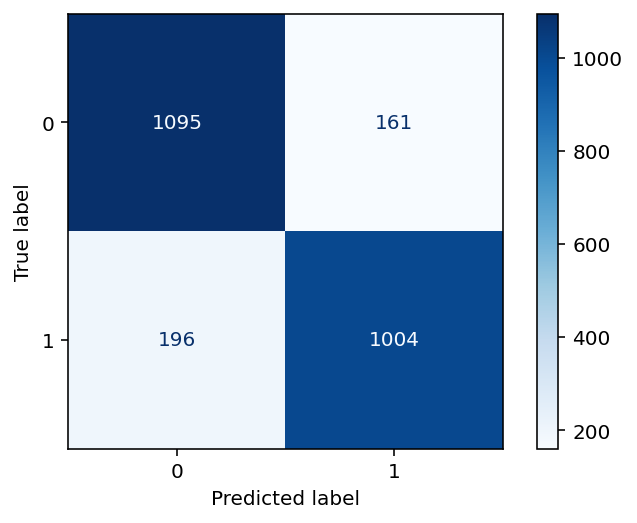

In [28]:
# Plot the confusion matrix
plot_confusion_matrix(gs_mnb, X_test, y_test, cmap = 'Blues', values_format = 'd')

In [29]:
# Calculate specificity
mnb_specificity = tn/(tn+fp)
mnb_specificity

0.8718152866242038

In [30]:
# Calculate sensitivity
mnb_sensitivity = recall_score(y_test, y_pred_mnb)
mnb_sensitivity 

0.8366666666666667

In [31]:
# Calculate pricision
mnb_precision = precision_score(y_test, y_pred_mnb)
mnb_precision

0.8618025751072962

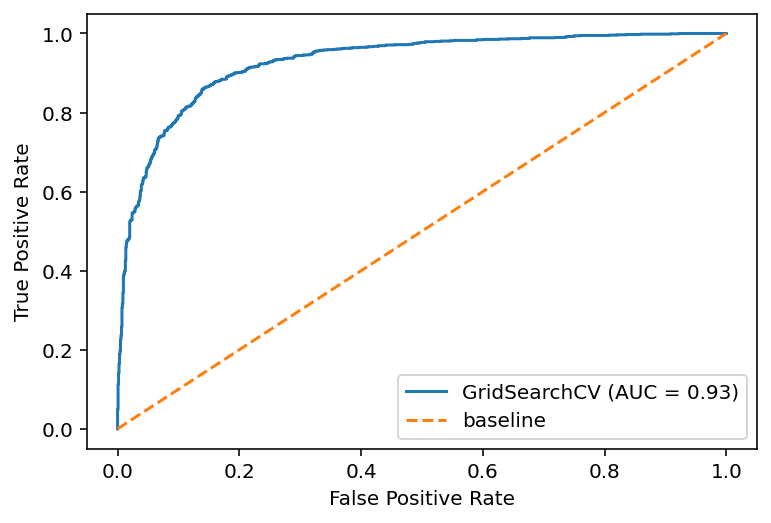

In [32]:
# Plot the ROC AUC curve
plot_roc_curve(gs_mnb, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [80]:
# Calculate f1 score
mnb_f1score = f1_score(y_test, y_pred_mnb)
mnb_f1score

0.8490486257928119

In [35]:
# Calculate the ROC AUC score
roc_auc_score(y_test, gs_mnb.predict_proba(X_test)[:,1])

0.9280928211252655

### 6.6 k-Nearest Neighbours

In [36]:
# Pipeline for CountVectorizer
knn_pipe = Pipeline(steps = [("tvec", TfidfVectorizer()), ("knn", KNeighborsClassifier())])

In [37]:
# Setting the hyperparameters values to gridsearch over

knn_pipe_params = {
    "tvec__max_features": [4000,5000], 
    "tvec__min_df": [3,5,10],
    "tvec__max_df": [0.85,0.90],
    "tvec__stop_words": [None, 'english'],
    "tvec__ngram_range": [(1,1), (1,2)],
    "knn__n_neighbors":[100, 500, 1000],
    "knn__weights": ['uniform', 'distance'],
    "knn__p": [1,2]
}

In [38]:
# Instantiate GridSearchCV
gs_knn = GridSearchCV(knn_pipe, param_grid = knn_pipe_params, cv=5, verbose=1, n_jobs = 4)

In [39]:
# Fit GridSearch to training data
gs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   39.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  9.8min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 15.8min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 21.6min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 31.4min
[Parallel(n_jobs=4)]: Done 2880 out of 2880 | elapsed: 35.6min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=4,
             param_grid={'knn__n_neighbors': [100, 500, 1000], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance'],
                         'tvec__max_df': [0.85, 0.9],
                         'tvec__max_features': [4000, 5000],
                         'tvec__min_df': [3, 5, 10],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']},
             verbose=1)

In [40]:
#The best score
gs_knn.best_score_

0.8182213354630292

In [41]:
# Obtain the best parameters
gs_knn.best_params_

{'knn__n_neighbors': 100,
 'knn__p': 2,
 'knn__weights': 'distance',
 'tvec__max_df': 0.85,
 'tvec__max_features': 5000,
 'tvec__min_df': 10,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

In [42]:
# Fit with the best parameters
knn_best_model = gs_knn.best_estimator_.fit(X_train, y_train)
knn_best_model.fit(X_train, y_train)

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.85, max_features=5000, min_df=10,
                                 ngram_range=(1, 2), stop_words='english')),
                ('knn',
                 KNeighborsClassifier(n_neighbors=100, weights='distance'))])

In [43]:
# Score on the training set
knn_best_model.score(X_train, y_train)

0.9993212055389628

In [44]:
# Score on the testing set (accuracy)
knn_best_model.score(X_test, y_test)

0.8216612377850163

In [45]:
# Create a dataframe of the fittings performed in GridSearch
gs_knn_df = pd.DataFrame(gs_knn.cv_results_)
gs_knn_df.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__p,param_knn__weights,param_tvec__max_df,param_tvec__max_features,param_tvec__min_df,...,param_tvec__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
167,2.071942,0.067932,0.765301,0.045181,100,2,distance,0.85,5000,10,...,english,"{'knn__n_neighbors': 100, 'knn__p': 2, 'knn__weights': 'distance', 'tvec__max_df': 0.85, 'tvec__max_features': 5000, 'tvec__min_df': 10, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}",0.799864,0.816701,0.832315,0.815343,0.826884,0.818221,0.011147,1
191,1.993359,0.058284,0.844680,0.126342,100,2,distance,0.9,5000,10,...,english,"{'knn__n_neighbors': 100, 'knn__p': 2, 'knn__weights': 'distance', 'tvec__max_df': 0.9, 'tvec__max_features': 5000, 'tvec__min_df': 10, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}",0.799864,0.816701,0.832315,0.815343,0.826884,0.818221,0.011147,1
159,1.789081,0.058863,0.714302,0.063231,100,2,distance,0.85,5000,3,...,english,"{'knn__n_neighbors': 100, 'knn__p': 2, 'knn__weights': 'distance', 'tvec__max_df': 0.85, 'tvec__max_features': 5000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}",0.801221,0.815343,0.833673,0.813306,0.825526,0.817814,0.011070,3
183,1.882221,0.053771,0.752895,0.047852,100,2,distance,0.9,5000,3,...,english,"{'knn__n_neighbors': 100, 'knn__p': 2, 'knn__weights': 'distance', 'tvec__max_df': 0.9, 'tvec__max_features': 5000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}",0.801221,0.815343,0.833673,0.813306,0.825526,0.817814,0.011070,3
163,2.389208,0.250271,0.798191,0.028539,100,2,distance,0.85,5000,5,...,english,"{'knn__n_neighbors': 100, 'knn__p': 2, 'knn__weights': 'distance', 'tvec__max_df': 0.85, 'tvec__max_features': 5000, 'tvec__min_df': 5, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}",0.801900,0.813985,0.833673,0.816022,0.822811,0.817678,0.010464,5


In [46]:
# Obtain predictions
y_pred_knn = knn_best_model.predict(X_test)

In [47]:
# Confusion Matrix
cm_knn = confusion_matrix (y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()

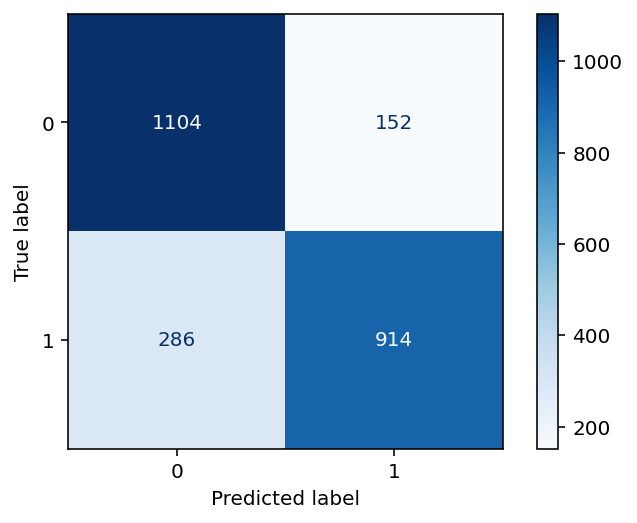

In [48]:
# Plot the confusion matrix 
plot_confusion_matrix(gs_knn, X_test, y_test, cmap = 'Blues', values_format = 'd')

In [49]:
# Calculate the specificity
knn_specificity = tn/(tn+fp)
knn_specificity

0.8789808917197452

In [50]:
# Calculate the sensitivity
knn_sensitivity = recall_score(y_test, y_pred_knn)
knn_sensitivity 

0.7616666666666667

In [51]:
# Calculate the precision
knn_precision = precision_score(y_test, y_pred_knn)
knn_precision

0.8574108818011257

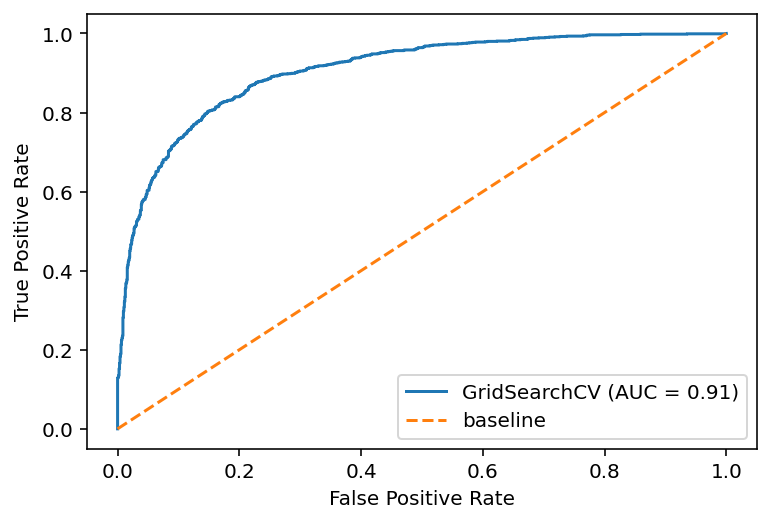

In [52]:
# Plot the ROC AUC curve
plot_roc_curve(gs_knn, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [79]:
# Calculate the f1 score
knn_f1score = f1_score(y_test, y_pred_knn)
knn_f1score

0.8067078552515445

In [55]:
# Calculate the ROC AUC score
roc_auc_score(y_test, gs_knn.predict_proba(X_test)[:,1])

0.9055457139065818

### 6.7 Logistic Regression

In [56]:
# Pipeline for CountVectorizer
logreg_pipe = Pipeline(steps = [("tvec", TfidfVectorizer()), ("logreg", LogisticRegression())])

In [57]:
# Setting the hyperparameters values to gridsearch over

gs_pipe_params = {
    "tvec__max_features": [4000,5000], 
    "tvec__min_df": [3,5,10],
    "tvec__max_df": [0.85,0.90],
    "tvec__stop_words": [None, 'english'],
    "tvec__ngram_range": [(1,1), (1,2)],
    "logreg__solver":['saga'],
    "logreg__penalty": ['none','l1','l2'],
    "logreg__random_state":[42],
    "logreg__C": [0.5, 0.75, 1, 1.5],
    "logreg__max_iter": [4000]
}

In [58]:
# Instantiate GridSearchCV
gs_logreg = GridSearchCV(logreg_pipe, param_grid = gs_pipe_params,cv = 5, verbose = 1, n_jobs = 4)

In [59]:
# Fit GridSearch to training data
gs_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  9.4min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 12.9min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 18.0min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 27.7min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 40.6min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 54.3min
[Parallel(n_jobs=4)]: Done 2880 out of 2880 | elapsed: 58.2min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=4,
             param_grid={'logreg__C': [0.5, 0.75, 1, 1.5],
                         'logreg__max_iter': [4000],
                         'logreg__penalty': ['none', 'l1', 'l2'],
                         'logreg__random_state': [42],
                         'logreg__solver': ['saga'],
                         'tvec__max_df': [0.85, 0.9],
                         'tvec__max_features': [4000, 5000],
                         'tvec__min_df': [3, 5, 10],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']},
             verbose=1)

In [60]:
#The best score
gs_logreg.best_score_

0.8429278344437782

In [61]:
# Obtain the best parameters
gs_logreg.best_params_

{'logreg__C': 0.75,
 'logreg__max_iter': 4000,
 'logreg__penalty': 'l2',
 'logreg__random_state': 42,
 'logreg__solver': 'saga',
 'tvec__max_df': 0.85,
 'tvec__max_features': 4000,
 'tvec__min_df': 10,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

In [62]:
# Fit with the best parameters
logreg_best_model = gs_logreg.best_estimator_.fit(X_train, y_train)
logreg_best_model.fit(X_train, y_train)

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.85, max_features=4000, min_df=10,
                                 ngram_range=(1, 2))),
                ('logreg',
                 LogisticRegression(C=0.75, max_iter=4000, random_state=42,
                                    solver='saga'))])

In [63]:
# Score on the training set
logreg_best_model.score(X_train, y_train)

0.8878631550366549

In [64]:
# Score on the testing set (accuracy)
logreg_best_model.score(X_test, y_test)

0.8460912052117264

In [77]:
# Create a dataframe of the fittings performed in GridSearch
gs_logreg_df = pd.DataFrame(gs_logreg.cv_results_)
gs_logreg_df.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logreg__C,param_logreg__max_iter,param_logreg__penalty,param_logreg__random_state,param_logreg__solver,param_tvec__max_df,...,param_tvec__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
250,1.957777,0.024430,0.201038,0.009055,0.75,4000,l2,42,saga,0.85,...,None,"{'logreg__C': 0.75, 'logreg__max_iter': 4000, 'logreg__penalty': 'l2', 'logreg__random_state': 42, 'logreg__solver': 'saga', 'tvec__max_df': 0.85, 'tvec__max_features': 4000, 'tvec__min_df': 10, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}",0.836499,0.832994,0.850645,0.849287,0.845214,0.842928,0.007003,1
274,2.003163,0.027133,0.205647,0.011656,0.75,4000,l2,42,saga,0.9,...,None,"{'logreg__C': 0.75, 'logreg__max_iter': 4000, 'logreg__penalty': 'l2', 'logreg__random_state': 42, 'logreg__solver': 'saga', 'tvec__max_df': 0.9, 'tvec__max_features': 4000, 'tvec__min_df': 10, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}",0.836499,0.832994,0.850645,0.849287,0.845214,0.842928,0.007003,1
398,1.948449,0.059835,0.205445,0.016197,1,4000,l2,42,saga,0.85,...,None,"{'logreg__C': 1, 'logreg__max_iter': 4000, 'logreg__penalty': 'l2', 'logreg__random_state': 42, 'logreg__solver': 'saga', 'tvec__max_df': 0.85, 'tvec__max_features': 5000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}",0.837178,0.830957,0.853360,0.847929,0.845214,0.842928,0.007943,3
422,1.977007,0.041143,0.206051,0.012000,1,4000,l2,42,saga,0.9,...,None,"{'logreg__C': 1, 'logreg__max_iter': 4000, 'logreg__penalty': 'l2', 'logreg__random_state': 42, 'logreg__solver': 'saga', 'tvec__max_df': 0.9, 'tvec__max_features': 5000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}",0.837178,0.830957,0.853360,0.847929,0.845214,0.842928,0.007943,3
394,1.976191,0.076225,0.201150,0.014806,1,4000,l2,42,saga,0.85,...,None,"{'logreg__C': 1, 'logreg__max_iter': 4000, 'logreg__penalty': 'l2', 'logreg__random_state': 42, 'logreg__solver': 'saga', 'tvec__max_df': 0.85, 'tvec__max_features': 4000, 'tvec__min_df': 10, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}",0.838535,0.832994,0.849966,0.849966,0.843177,0.842928,0.006590,5


In [66]:
# Obtain predictions
y_pred_logreg = logreg_best_model.predict(X_test)

In [67]:
# Confusion Matrix
cm_logreg = confusion_matrix (y_test, y_pred_logreg)
tn, fp, fn, tp = cm_logreg.ravel()

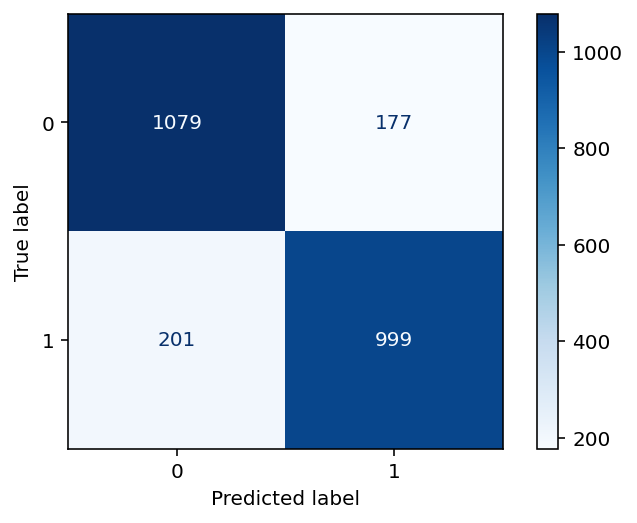

In [68]:
# Plot the consfusion matrix
plot_confusion_matrix(gs_logreg, X_test, y_test, cmap = 'Blues', values_format = 'd')

In [69]:
# Calculate the specificity
logreg_specificity = tn/(tn+fp)
logreg_specificity

0.8590764331210191

In [70]:
# Calculate the sensitivity
logreg_sensitivity = recall_score(y_test, y_pred_logreg)
logreg_sensitivity 

0.8325

In [71]:
# Calculate the precision
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_precision

0.8494897959183674

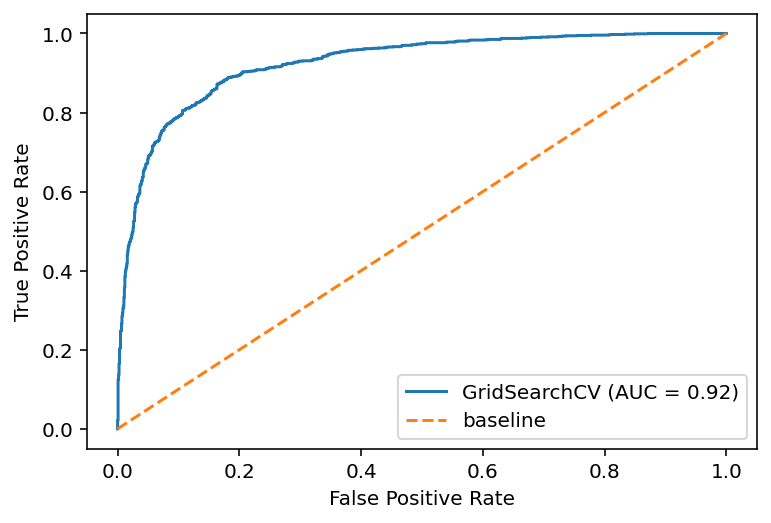

In [72]:
# Plot the ROC curve
plot_roc_curve(gs_logreg, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [78]:
# Calculate the f1 score
logreg_f1score = f1_score(y_test, y_pred_logreg)
logreg_f1score

0.8409090909090909

In [75]:
# Calculate the ROC AUC score
roc_auc_score(y_test, gs_logreg.predict_proba(X_test)[:,1])

0.924490114118896

## 7. Choice of Model and Model Evaluation

**Summary Table 1: Model Evaluation**

|        Model        |   Best Model parameters   | Transformer |   Best Transformer parameters| Model Best Score   | Training Score (Accuracy) | Testing Score (Accuracy) | Sensitivity | Specificity |
|:-------------------:|:-------------------:|:-------:|:----------:|:-----------------:|:----------------:|:-----------------:|:-----------------:|:-----------------:|
|        Null         |  NA |    NA   |     NA     |       0.5115      |      NA      |NA|NA|NA
|         Multinomial Naive Bayes        | alpha: 1.25<br />fit_prior: False |TfidfVectorizer| max_df: 0.85<br />max_features: 4000<br />min_df: 5<br />ngram_range: (1, 2)<br />stop_words: None|0.8431 |      0.8701      |      0.8546      |0.8367|0.8718|
|         k-Nearest-Neighbours        |n_neighbors: 100<br />p: 2<br />weights: distance| TfidfVectorizer|max_df: 0.85<br />max_features: 5000<br />min_df: 10<br />ngram_range: (1, 2)<br />stop_words: english |0.8182   | 0.9993    |    0.8217    |0.7617|0.8790|
|         Logistic regression       | C: 0.75<br />max_iter: 4000<br />penalty: l2<br />random_state: 42<br />solver: saga|TfidfVectorizer|max_df: 0.85<br />max_features: 4000<br />min_df: 10<br />ngram_range: (1, 2)<br />stop_words: None|0.8429  |     0.8879      |      0.8461     |0.8325|0.8591|

**Summary Table 2: Model Evaluation**

| Model|       Training Score (Accuracy)       |   Testing Score (Accuracy)   | Sensitivity |  Specificity | Misclassification rate   | Precision | F1 score | ROC AUC score |
|:-------------------:|:-------------------:|:-------:|:----------:|:-----------------:|:----------------:|:-----------------:|:-----------------:|:-----------------:|
| Null |  0.5115 |    0.5115   |     NA     |       NA      |      0.4885    |NA|NA|NA
|Multinomial Naive Bayes| 0.8701|0.8546 | 0.8367 |0.8718 | 0.1454    |0.8618|0.8490 |0.9281
| k-Nearest-Neighbours|0.9993 |0.8217  | 0.7617   |    0.8790    | 0.1783 |0.8574 |0.8067|0.9055
|Logistic regression| 0.8879 | 0.8461        | 0.8325  | 0.8591       |0.1539    |0.8495|0.8409|0.9245

This project aims to develop a model that are able to predict the identification of depression and loneliness of the social media forum, which is a categorical classification.

The evaluation for model performance.

**1. Null Model** 

Null model is a model that does not have any predictor values and uses the mean of the target Y as a prediction. This is also define as a baseline accuracy and the performance of the model will be compared with this baseline accuracy to understand if the model is performing better than null model and whether the trained model has any predictor values.
* In our modeling, all the models has a score of more than 0.8 in comparison with the null model which is 0.5115, thus, all models here have some predictors value.

**2. Multinomial Naive Bayes**

Naive Bayes makes the assumption that all features are independent of one another. Although text data is not independent, however, naive bayes serves as a fast modeling algorithm that are useful with lots of features or data, which happens with text analysis, which the words forms a feature. In addition, multinomial naive bayes serves as a excellant classifier. And multinomial naive bayes are seleted as X variables used in this project consists of positive variables. 
* In our modeling, the multinomial naive bayes has a training and testing score of 0.87 and 0.85 respectively. This indicates that 85% of the variability of the words can be explained by the x predictors in our model. While it is observed that the train score is slightly higher than the test score. This might indicate that there is slight overfitting. Nevertheless, this model fits our study criteria with an accuracy of more than 80%. 

**3. K-nearest neighbours**

k_nearest neightbors is useful when they are potential non-linear boundaries separating classes of values of iterest. It will examine the points around (its neighbors) to determine the value of the point of interest by calculating the distance between neighbors. The point of interest will get the majority of the average value. The main advantage of using knn is that it can be used for multiclass classification. As knn measures by the distance between the neighbors, they are highly sensitive to the magnitude of the features and requires scaling the data. In addition, the predictor variables will have to be numeric variables only and knn does not have feature importance.
* In our modeling, the k-nearest-neighbours have a training and testing score of 0.9993 and 0.8217 respectively. This indicate that 82% of the variability can be explained by the x predictors in our model. It can be seen that there is an overfitting of the model due to a very high training score in comparison with testing score. This might indicate a very high variance. In order to combat the overfitting, the n_neighbors, which defines the number of neighbours can be increase to decrease the variance. However, with the range covered, knn favours the lowest which is 100 n_neighbours. This observation was also seen when a preliminary screening in which the n_neighbours that covers a wider range while other parameters remains fixed were performed prior to running the final gridsearch above. Similar results was yield whereby the lowest range was preferred. This may indicate that the choice of trained model may not be suitable or there is a very high complexity of data making it hard to predict. Hence, we can either reduce the number of predictors by further removing stop words or unnecessary filler words or choose another model. Nevertheless, this model fits our study criteria with an accuracy of more than 80%. 

**4. Logistic Regression**

Logistic regression is the classification to find the probability of the event success and its failure. It categorizes the data into discrete classes by studying the relationship with labelled data, which are linear relationship and forms a sigmoid function with an output of probability.
It can be used for multinomial regression and a probabilitics view of class predictions whereby it provides a measures the importance (coefficient size) with its direction of association. However, logistic regression may be prone to overfitting if the number of features is more than the number of observations, which can be a case in text analysis, thus requiring regularization to avoid over-fitting in these scenarios. In addition, it requires average or no multicollinearity between independent variables.  
* In our modeling, the logistic regression have a training and testing score of 0.8879 and 0.8461 respectively. This indicates that 88% of the variability of the words can be explained by the x predictors in our model. While it is observed that the train score is higher than the test score. This might indicate that there is slight overfitting although ridge regularization was used. Nevertheless, this model fits our study criteria with an accuracy of more than 80%. 

**Model Evaluation**

With the evaluation of the scoring of each model, all three models have a high accuracy with more than 80%. For all three models, they have a lesser misclassification rate than the null model of about 30%. Out of the three models, Multinomial Naive Bayes have the lowest misclassification rate, which signifies the lowest inaccurate predictions of the observations. Apart from accuracy,we would like to understand more about the how often it predicts correctly (sensitivity) and wrongly (specificity). From our findings, both logistic regression and Multinomial Naive Bayes model has similar sensitivity with Multinomial Naive Bayes having the highest sensitivity and specificity of 0.8367 and 0.8718 respectively compared to the other models. 

To further evaluate accuracy of correctly identifying the forum by the model, we would like to explore the precision score. To understand how many of our model's prediction of positive is true, we look into precision in which all three models have relatively good precision with Multinomial Naive Bayes have the highest score. With understanding precision and recall (sensitivity) is a weighted average, we will look into the F1 score, whereby Logistic Regression and Multinomial Naive Bayes have similar F1 score with Multinomial Naive Bayes having the highest F1 score. 

Recognizing that sensitivity and specificity is a tradeoff, a better evaluation of the model is by looking at the receiver operating characteristics (ROC) curve in which it measures the overlap exists between the distributions. A good ROC score is defined in which a score of above 0.5, with 0.5 being perfectly overlapped, to 1.0 (perfectly separated). In our results, all three models have a high ROC area under the curve (AUC) score with more than 0.9 with Multinomial Naive Bayes having the highest ROC AUC curve of 0.9281, which indicates it has the highest performance out of the three models.

With these findings, Multinomial Naive Bayes fits our criteria the best, as it has the highest score with an accuracy of more than 80%, the highest sensitivity, specificty, precision, f1score and ROCC AUC score compared to the other models. Thus, this selected model will help to predict the people having depression or loneliness through other communication means including chatbox and the helpline and thus the mental health institution is able to provide a better assistance and reachout to the person in need.

## 8. Conclusions and Recommendations

## Conclusions 

Depression and loneliness are often associated together due to their high similarity in symptoms despite its differences in which one being a mental health condition while the later being an emotional state. Thus, in our project, we aim to distinguish the differences between depression and loneliness behavoural via the identification of word expression in social media forum. In addition, our goal is to build models to predict this identification and select a model with the highest accuracy and having more than 80% accuracy that takes into the account of the similarity between depression and loneliness. 

In conclusion, we have collected about 5000 posts from each forum. We then performed data cleaning of the posts and title of the datasets followed by exploring and visualizing the data using exploratory data analysis. We then processed the text and title, and we subjected these into countvectorizer to transform the text and title into word counts which we then can analyze the top common words in each forum. From our findings, we have discovered words of the top 30 frequeny of the most common words that are specific to the forum. These word allows us to distinguish the differences between loneliness and depression in social media forum and will provide an insight to facilitate the mental health institution in the assessment or identification process of people experiencing loneliness and depression. 

Using the processed text, we built four models: null model, Multinomial Naive Bayes, k-Nearest Neighbours and Logistic Regression. All three models 
have a score of 0.8, which is higher than the null model, 0.5. Both Logistic Regression and Multinomial Naive Bayes have similar training and testing score while Multinomial Naive Bayes score better then the other models in other parameters including sensitivity, specificty, precision, F1 score and ROCC AUC score. Using this selected model, we are able to facilitate the identification of people potentially having depression or loneliness through communication means including chatbox and the helpline and thus the mental health institution is able to provide a better assistance and reachout to the person in need.

## Recommendations

Overall, the top 10 differences between depression and loneliness behavioural through the word expression is alone, girl, date, relationship, guy, depress, help, live, thought and need. These words found will help to distinguish the differences between loneliness and depression and will provide an insight to facilitate the mental health institution in the assessment or identification process of people experiencing loneliness and depression. 

Of the models built, Multinomial Naive Bayes model are able to achieve an accuracy rate of more than 80% and this model score better then the other models in other parameters including sensitivity, specificty, precision, F1 score and ROCC AUC score. Using this selected model, we are able to facilitate the identification of people potentially having depression or loneliness through communication means including chatbox and the helpline and thus the mental health institution is able to provide a better assistance and reachout to the person in need.

## Future Development

With these findings, the project can be further explored to classify the identification of people who are undergoing different severity of depression and loneliness such as from mild, moderate to severe condition.
This can be done using the data collection which we have with severe condition of depression [(r/depressed)](https://www.reddit.com/r/depressed/) and loneliness [(r/lonely)](https://www.reddit.com/r/lonely/). As suicidal and depression are associated, the project can also be explored in classifiying the identification of people who are depressed with people who are having severe depression leading to suicidal thoughts [(r/SuicideWatch)](https://www.reddit.com/r/SuicideWatch/). The identification of these three group pairs will help to provide insights to facilitate the mental health institution in the assessment of identification process of people experiencing these conditions and to offer reachout to the person in need on a timely manner.